# Color Image에 Histogram Equalization 적용하기

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
# chelsea 이미지를 사용
from skimage import data

(300, 451, 3)


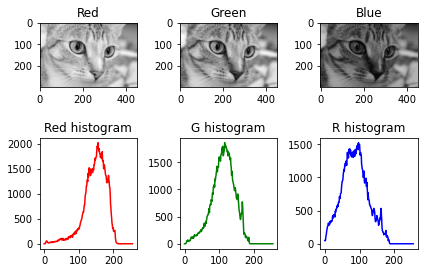

In [42]:
img = data.chelsea() # RGB이미지
print(img.shape)
plt.imshow(img)

r,g,b = cv2.split(img)

plt.subplot(231)
plt.title('Red')
plt.imshow(r, cmap='gray')

plt.subplot(232)
plt.title('Green')
plt.imshow(g, cmap='gray')

plt.subplot(233)
plt.title('Blue')
plt.imshow(b, cmap='gray')
#print(r_img.shape, g_img.shape, b_img.shape)

# r,g,b값에 해당하는 histogram을 출력한다.
hist_r = cv2.calcHist([img], [0], None, [256], [0,256])
hist_g = cv2.calcHist([img], [1], None, [256], [0,256])
hist_b = cv2.calcHist([img], [2], None, [256], [0,256])

plt.subplot(234)
plt.title('Red histogram')
plt.plot(hist_r, color='r')

plt.subplot(235)
plt.title('G histogram')
plt.plot(hist_g, color='g')

plt.subplot(236)
plt.title('R histogram')
plt.plot(hist_b, color='b')

plt.tight_layout()

## HSV로 Convert 후, Histogram Equalization

GrayScale에서 Histogram Equalization을 한다는 것은 Brightness(Intensity) 
   
histogram의 분포를 균일하게 만들어주는 것이기 때문에, Color image에 대해서는 
   
HSV로 Color space를 바꿔서, 밝기 성분에 해당하는 V에 대해 Histogram Equalization을 
   
실행하고 다시 Color space를 BGR 또는 RGB로 바꿔주는 방법을 사용해야한다.

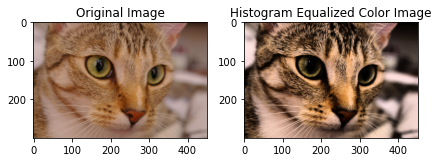

In [44]:
img = data.chelsea()
src = img.copy()
hsv_img = cv2.cvtColor(src, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv_img)
v_he = cv2.equalizeHist(v)

new_hsv_img = cv2.merge([h,s,v_he])
img_he = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2RGB)

plt.subplot(121)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(122)
plt.title("Histogram Equalized Color Image")
plt.imshow(img_he)
plt.tight_layout()